<a href="https://colab.research.google.com/github/Dvados/NM/blob/main/%D0%9B%D1%804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №4 студента групи АнД-31 Тищенко Владислава

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
# 9 2 6
classes = ['Sandal','Bag', 'Pullover']

myTrain_data = []
myTrain_labels = []
myTest_data = []
myTest_labels  = []

for i in range(len(train_labels)):
  if (train_labels[i]==6 or train_labels[i]==9 or train_labels[i]==2 ):
    myTrain_data.append(train_data[i])
    myTrain_labels.append(train_labels[i])

for i in range(len(test_labels)):
  if (test_labels[i]==6 or test_labels[i]==9 or test_labels[i]==2 ):
    myTest_data.append(test_data[i])
    myTest_labels.append(test_labels[i])

my_train_data = np.array(myTrain_data)
my_train_labels = np.array(myTrain_labels)
my_test_data= np.array(myTest_data)
my_test_labels  = np.array(myTest_labels)

In [3]:
# Check the shape of our data and single example
print('Shape')
print(my_train_data.shape, my_train_labels.shape, my_test_data.shape, my_test_labels.shape)
print(my_train_data[0].shape, my_train_labels[0].shape)
print('\nData')
print(f"Training sample:\n{my_train_data[0]}\n")
print(f"Training lables:\n{my_train_labels[0]}")

Shape
(18000, 28, 28) (18000,) (3000, 28, 28) (3000,)
(28, 28) ()

Data
Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 

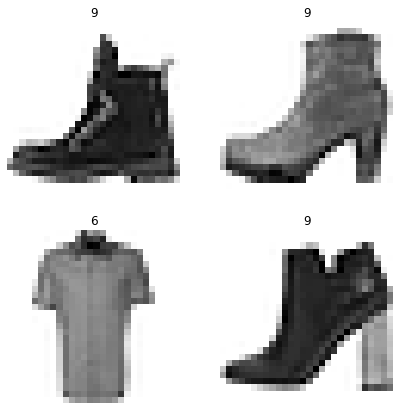

In [4]:
# Plot multiple random images of fashion MNIST
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(my_train_data)))
  plt.imshow(my_train_data[rand_index], cmap=plt.cm.binary)
  plt.title(my_train_labels[rand_index])
  plt.axis(False)

In [5]:
# normalize
my_train_data = my_train_data / 255.0
my_test_data = my_test_data / 255.0

Epoch 1/40
563/563 [==============================] - 2s 2ms/step - loss: 0.5848 - accuracy: 0.7441 - val_loss: 0.3382 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.3011 - accuracy: 0.8758 - val_loss: 0.2972 - val_accuracy: 0.8767 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.2728 - val_accuracy: 0.8863 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2551 - accuracy: 0.8932 - val_loss: 0.2644 - val_accuracy: 0.8893 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.8952 - val_loss: 0.2633 - val_accuracy: 0.8867 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.9004 - val_loss: 0.2584 - val_accuracy: 0.8917 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - lo

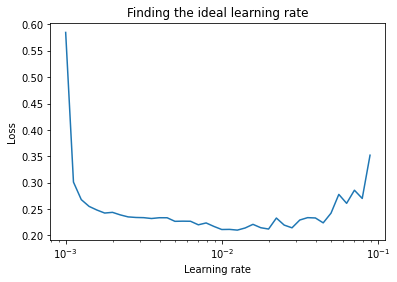

In [6]:
# creating a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

find_lr_history = model.fit(my_train_data,
                    my_train_labels,
                    epochs=40,
                    validation_data=(my_test_data, my_test_labels),
                    callbacks=[lr_scheduler])

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0071),
                 metrics=["accuracy"])


find_lr_history = model.fit(my_train_data,
                    my_train_labels,
                    epochs=20,
                    validation_data=(my_test_data, my_test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.6102 - accuracy: 0.7584 - val_loss: 0.3757 - val_accuracy: 0.8460
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8360 - val_loss: 0.3490 - val_accuracy: 0.8663
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8596 - val_loss: 0.3635 - val_accuracy: 0.8647
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.8638 - val_loss: 0.3847 - val_accuracy: 0.8403
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3008 - accuracy: 0.8709 - val_loss: 0.4013 - val_accuracy: 0.8407
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.3020 - accuracy: 0.8723 - val_loss: 0.3449 - val_accuracy: 0.8737
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.2970 - accuracy: 0.8759 - val_loss: 0.3387 - val_accuracy: 0.8763
Epoch 8/20
563/56

In [8]:
from sklearn.metrics import confusion_matrix
# Make predictions with model
y_probs = model.predict(my_test_data) 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
print(y_preds[:10])

confusion_matrix(y_true=my_test_labels, 
                 y_pred=y_preds)

[9 2 6 6 2 2 9 6 9 9]


array([[895,  91,  14],
       [264, 734,   2],
       [  3,   1, 996]])